In [269]:
import pandas as pd
import numpy as np

df=pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


## Dodawanie liczby 1 jako 1 wydarzenia

In [271]:
df['deaths']=1
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1


# 1.Tabela z rasami oraz informacją o chorobie psychicznej i ilością śmierci

In [274]:
df2=df.pivot_table(values='deaths',index=['race','signs_of_mental_illness'],aggfunc=np.sum)
df2

deaths
race signs_of_mental_illness        
A    False                        69
     True                         24
B    False                      1114
     True                        184
H    False                       745
     True                        157
N    False                        64
     True                         14
O    False                        37
     True                         11
W    False                      1763
     True                        713

In [292]:
rows=df2.index.tolist()
rows

[('A', False),
 ('A', True),
 ('B', False),
 ('B', True),
 ('H', False),
 ('H', True),
 ('N', False),
 ('N', True),
 ('O', False),
 ('O', True),
 ('W', False),
 ('W', True)]

### lista odsetków chorób psychicznych:
(nie wiedziałem jak to zrobić przy użyciu podanych metod, więc trochę to ominąłem)

In [302]:
mi_interest=[]
for i in range (0,len(rows)):
    for row in rows[i][0]:
        mi_interest.append((df2.loc[[row]]).iloc[1][0]/(df2.loc[[row]]).iloc[0][0])

mi_interest
for i in range(0,int(len(mi_interest)/2)):
    mi_interest[i*2]=''
mi_interest

['',
 0.34782608695652173,
 '',
 0.1651705565529623,
 '',
 0.21073825503355706,
 '',
 0.21875,
 '',
 0.2972972972972973,
 '',
 0.40442427680090753]

In [304]:
df2['mental_illness_interest']=mi_interest
df2

deaths mental_illness_interest
race signs_of_mental_illness                                
A    False                        69                        
     True                         24                0.347826
B    False                      1114                        
     True                        184                0.165171
H    False                       745                        
     True                        157                0.210738
N    False                        64                        
     True                         14                 0.21875
O    False                        37                        
     True                         11                0.297297
W    False                      1763                        
     True                        713                0.404424

## Odp. Największy odsetek chorób psychicznych jest wśród rasy białej

# Konwersja daty do formatu datetime:

In [308]:
df['date']=pd.to_datetime(df['date'])
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1


# Dodawanie dnia tygodnia wydarzenia do tabeli:

In [350]:
df2=df['date'].dt.day_name()
df2.rename('day',inplace=True)
df3=pd.concat([df,df2],axis=1)
df3

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,1,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,1,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,1,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,1,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,1,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,1,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,1,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,1,Tuesday


# Sortowanie dni tygodnia

In [360]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df3['day'] = pd.Categorical(df3['day'], categories=cats, ordered=True)
df4=df3.sort_values('day')
df4

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths,day
949,1093,Hector Alvarez,2015-12-14,shot,undetermined,19.0,M,H,Gilroy,CA,False,undetermined,NaN,True,1,Monday
1276,1454,Efren Eloy Trujillo,2016-04-11,shot,gun,22.0,M,H,Las Vegas,NV,False,attack,Not fleeing,False,1,Monday
4533,4949,Scott Souders,2019-08-12,shot,gun,38.0,M,W,Chetopa,KS,False,attack,Not fleeing,False,1,Monday
4532,4945,Aaron Luther,2019-08-12,shot,gun,49.0,M,W,Riverside,CA,False,attack,Not fleeing,False,1,Monday
1277,1455,Pierre Loury,2016-04-11,shot,gun,16.0,M,B,Chicago,IL,False,attack,Foot,False,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,3562,Bobby Hinton,2018-04-01,shot,gun,60.0,M,B,New Llano,LA,False,attack,Not fleeing,False,1,Sunday
4012,4429,Jacob Archambault,2019-01-27,shot,vehicle,25.0,M,N,Rosebud,SD,False,attack,Car,False,1,Sunday
3232,3563,Joseph Walden Johnson,2018-04-01,shot,gun,24.0,M,W,Goodbee,LA,False,attack,Car,False,1,Sunday
2578,2862,Patrick Harmon,2017-08-13,shot,knife,50.0,M,B,Salt Lake City,UT,False,other,Foot,True,1,Sunday


# Zliczanie wydarzeń wg dnia tygodnia:

In [362]:
df5=df4.pivot_table(values='deaths',index=['day'],aggfunc=np.sum)
df5

,deaths
day,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


# Wykres śmierci wg dnia tygodnia:

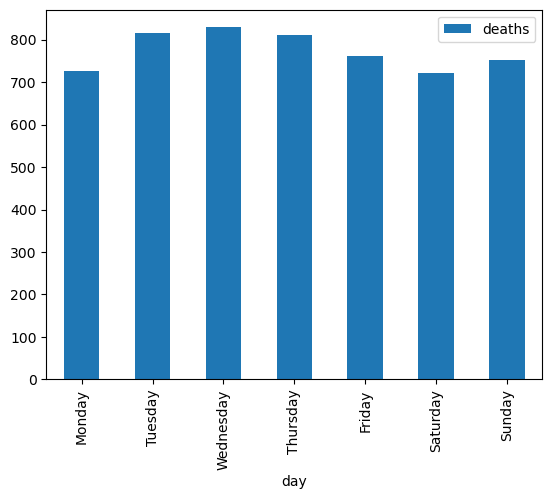

In [645]:
ax=df5.plot(kind='bar', rot=90,width=0.5)

# Wczytywanie danych dot. populacji poszczególnych stanów USA:

In [589]:
states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
states_population=states[0]
states_population

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1.0,1.0,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2.0,2.0,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3.0,4.0,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4.0,3.0,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5.0,6.0,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6.0,5.0,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7.0,7.0,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8.0,9.0,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9.0,10.0,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10.0,8.0,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


Wczytywanie danych dot. skrótów poszczególnych stanów (+ uporządkowanie nazw kolumn)

In [580]:
states2 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
states2[0].columns=['Name','Region','ISO','ANSI1','ANSI2','USPS','USCG','GPO','AP','Other abbrevations']
states2[0]

,Name,Region,ISO,ANSI1,ANSI2,USPS,USCG,GPO,AP,Other abbrevations
0,Codes:,Codes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
83,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
84,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
85,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
86,Philippine Islands,Obsolete postal code,PH PHL 608[10],NaN,NaN,PI,NaN,NaN,NaN,NaN


# Dwie tabele (2 komórki poniżej do połączenia w jedną)

In [585]:
states_id=states2[0].drop(['Region','ISO','ANSI1','ANSI2','USCG','GPO','AP','Other abbrevations'],axis=1)
states_id.dropna(how='any',inplace=True)
states_id=states_id.rename(columns={'USPS':'State_ID','Name':'State'})
states_id_final=states_id.drop(8)
states_id_final

,State,State_ID
11,Alabama,AL
12,Alaska,AK
13,Arizona,AZ
14,Arkansas,AR
15,California,CA
...,...,...
83,Nebraska,NB
84,Northern Mariana Islands,CM
85,Panama Canal Zone,CZ
86,Philippine Islands,PI


In [591]:
states_population=states_population.drop(['Rank in states & territories, 2020','Rank in states & territories, 2010','Census population, April 1, 2010 [1][2]','Percent change, 2010–2020 [note 1]','Absolute change, 2010-2020','Total seats in the U.S. House of Representatives, 2023–2033','Census population per electoral vote [note 2]','Census population per House seat','Percent of the total U.S. population, 2020 [note 3]'],axis=1)
states_population=states_population.rename(columns={'Census population, April 1, 2020 [1][2]':'state_population'})
states_population

,State,state_population
0,California,38538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


# Gotowa tabela ze skrótami nazw stanów i ich populacją:

In [593]:
states=pd.merge(states_id_final,states_population,on='State')
states=states.drop('State',axis=1)
states=states.rename(columns={'State_ID':'state'})
states

,state,state_population
0,AL,5024279
1,AK,733391
2,AZ,7151502
3,AR,3011524
4,CA,38538223
5,CO,5773714
6,CT,3605944
7,DE,989948
8,DC,689545
9,FL,21538187


# Dodawanie danych dot. populacji stanów do bazy danych przestępstw:

In [595]:
df6=pd.merge(df,states,on='state')
df6

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths,state_population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,1,7705281
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,1,7705281
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,1,7705281
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,1,7705281
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,1,7705281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,1,643077
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,1,1097379
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,1,1097379
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,1,1097379


# Najpierw stworzę tabelę, ile było śmiertelnych interwencji w każdym ze stanów:

In [598]:
deaths_by_state=df6.pivot_table(values='deaths',index=['state'],aggfunc=np.sum)
deaths_by_state

,deaths
state,
AK,39
AL,104
AR,83
AZ,254
CA,799
CO,195
CT,21
DC,13
DE,13


# Łącze dane dot. ilości śmierci w poszczególnych stanach z populacją tych stanów:

In [600]:
deaths_by_state=pd.merge(deaths_by_state,states,on='state')
deaths_by_state

,state,deaths,state_population
0,AK,39,733391
1,AL,104,5024279
2,AR,83,3011524
3,AZ,254,7151502
4,CA,799,38538223
5,CO,195,5773714
6,CT,21,3605944
7,DC,13,689545
8,DE,13,989948
9,FL,350,21538187


# Dzielenie liczby mieszkańców stanu przez 1000

In [606]:
def how_many_thousands_in_state(x):
    return x*0.001

In [647]:
deaths_by_state['thousands_in_state']=deaths_by_state['state_population'].apply(lambda x: how_many_thousands_in_state(x))
deaths_by_state

,state,deaths,state_population,deaths_per_1000_citizens,thousands_in_state
0,AK,39,733391,0.053178,733.391
1,AL,104,5024279,0.020699,5024.279
2,AR,83,3011524,0.027561,3011.524
3,AZ,254,7151502,0.035517,7151.502
4,CA,799,38538223,0.020733,38538.223
5,CO,195,5773714,0.033774,5773.714
6,CT,21,3605944,0.005824,3605.944
7,DC,13,689545,0.018853,689.545
8,DE,13,989948,0.013132,989.948
9,FL,350,21538187,0.016250,21538.187


# Gotowa tabela z ilością śmiertelnych interwencji policji na 1000 mieszkańców danego stanu:

In [626]:
deaths_by_state['deaths_per_1000_citizens']=deaths_by_state['deaths'].divide(deaths_by_state['thousands_in_state'])
deaths_by_state=deaths_by_state.drop('thousands_in_state',axis=1)
deaths_by_state

,state,deaths,state_population,deaths_per_1000_citizens
0,AK,39,733391,0.053178
1,AL,104,5024279,0.020699
2,AR,83,3011524,0.027561
3,AZ,254,7151502,0.035517
4,CA,799,38538223,0.020733
5,CO,195,5773714,0.033774
6,CT,21,3605944,0.005824
7,DC,13,689545,0.018853
8,DE,13,989948,0.013132
9,FL,350,21538187,0.016250
